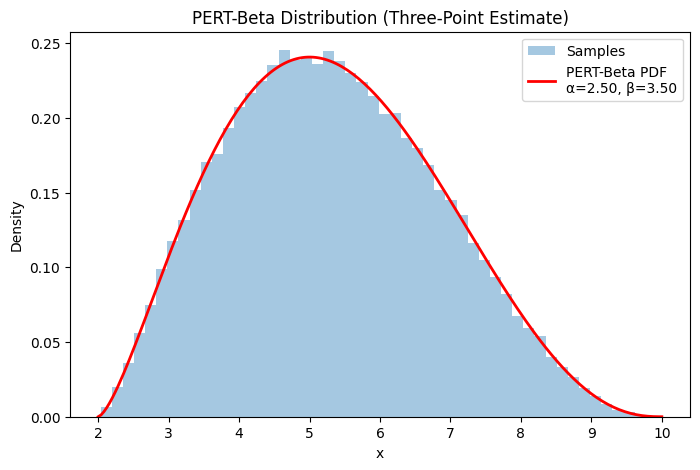

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def pert_beta(a, m, b, lamb=4, size=10000):
    """
    Generate random samples from a PERT-Beta distribution.
    
    Parameters:
        a (float): Minimum value
        m (float): Mode (most likely value)
        b (float): Maximum value
        lamb (float): Weight parameter (default=4, standard PERT)
        size (int): Number of samples
    """
    alpha = 1 + lamb * (m - a) / (b - a)
    beta_param = 1 + lamb * (b - m) / (b - a)
    
    samples = a + (b - a) * np.random.beta(alpha, beta_param, size=size)
    return samples, alpha, beta_param

# Example usage:
a, m, b = 2, 5, 10
samples, alpha, beta_param = pert_beta(a, m, b, size=100000)

# Plot
x = np.linspace(a, b, 200)
pdf = beta.pdf((x - a) / (b - a), alpha, beta_param) / (b - a)

plt.figure(figsize=(8,5))
plt.hist(samples, bins=50, density=True, alpha=0.4, label="Samples")
plt.plot(x, pdf, 'r-', lw=2, label=f"PERT-Beta PDF\nα={alpha:.2f}, β={beta_param:.2f}")
plt.title("PERT-Beta Distribution (Three-Point Estimate)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


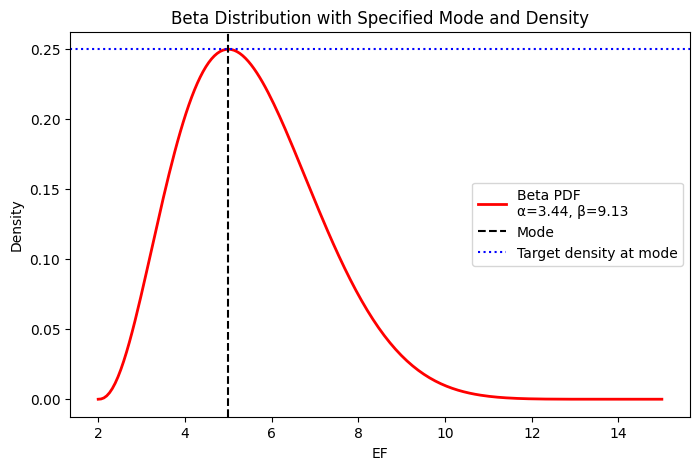

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.special import beta as beta_func
from scipy.optimize import fsolve

def beta_with_mode_density(a, m, b, h_star):
    """
    Find alpha, beta for a Beta distribution on [a,b] 
    that has mode at m and density f(m)=h_star.
    """
    def equations(params):
        alpha, beta_param = params
        
        # Equation 1: mode condition
        mode_est = (alpha - 1) / (alpha + beta_param - 2) * (b - a) + a
        eq1 = mode_est - m
        
        # Equation 2: density at mode
        f_m = ((m - a)**(alpha-1) * (b - m)**(beta_param-1)) / ((b - a)**(alpha+beta_param-1) * beta_func(alpha, beta_param))
        eq2 = f_m - h_star
        
        return (eq1, eq2)

    # Initial guess: use PERT-Beta parameters
    alpha0 = 2.0
    beta0 = 2.0
    alpha, beta_param = fsolve(equations, (alpha0, beta0))
    return alpha, beta_param

def beta_interval_prob(a, b, alpha, beta_param, x1, x2):
    """Probability that X lies between x1 and x2 for Beta on [a,b]."""
    cdf1 = beta.cdf((x1 - a) / (b - a), alpha, beta_param)
    cdf2 = beta.cdf((x2 - a) / (b - a), alpha, beta_param)
    return cdf2 - cdf1

# Example
a, m, b = 2, 5, 15
h_star = 0.25  # desired density at the mode

alpha, beta_param = beta_with_mode_density(a, m, b, h_star)

# Generate samples
x = np.linspace(a, b, 200)
pdf = beta.pdf((x - a)/(b - a), alpha, beta_param) / (b - a)

plt.figure(figsize=(8,5))
plt.plot(x, pdf, 'r-', lw=2, label=f"Beta PDF\nα={alpha:.2f}, β={beta_param:.2f}")
plt.axvline(m, color='k', linestyle='--', label="Mode")
plt.axhline(h_star, color='b', linestyle=':', label="Target density at mode")
plt.title("Beta Distribution with Specified Mode and Density")
plt.xlabel("EF")
plt.ylabel("Density")
plt.legend()
plt.show()


In [19]:
# Probability between 2 and 3
p = beta_interval_prob(a, b, alpha, beta_param, 10, 15)
print(f"Probability between 8 and 10: {p*100:.2f}%")


Probability between 8 and 10: 0.62%


α=1.810, β=3.699
25th percentile value = 5.985, density there = 0.150


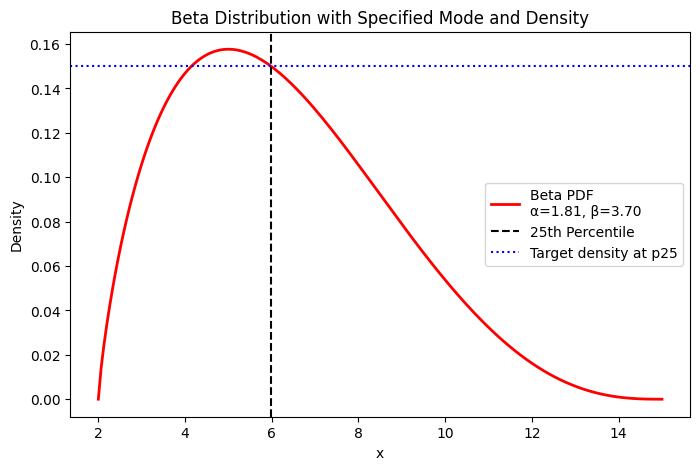

In [31]:
import numpy as np
from scipy.stats import beta
from scipy.special import beta as beta_func
from scipy.optimize import fsolve

def beta_with_percentile_density(a, m, b, p, h_star):
    """
    Find alpha, beta for a Beta distribution on [a,b] 
    such that:
    - Mode = m
    - Density at the p-th percentile = h_star
    """
    def equations(params):
        alpha, beta_param = params
        
        # Eqn 1: Mode condition
        mode_est = (alpha - 1) / (alpha + beta_param - 2) * (b - a) + a
        eq1 = mode_est - m

        # Percentile value
        q_p = a + (b - a) * beta.ppf(p, alpha, beta_param)

        # Eqn 2: density at that percentile
        f_qp = beta.pdf((q_p - a)/(b - a), alpha, beta_param) / (b - a)
        eq2 = f_qp - h_star
        
        return (eq1, eq2)

    # Initial guess
    alpha0, beta0 = 2.0, 2.0
    alpha, beta_param = fsolve(equations, (alpha0, beta0))
    return alpha, beta_param

# Example
a, m, b = 2, 5, 15
p = 0.5   # 25th percentile
h_star = 0.15

alpha, beta_param = beta_with_percentile_density(a, m, b, p, h_star)
print(f"α={alpha:.3f}, β={beta_param:.3f}")

# Test density at 25th percentile
q25 = a + (b - a) * beta.ppf(p, alpha, beta_param)
density_q25 = beta.pdf((q25 - a)/(b - a), alpha, beta_param) / (b - a)
print(f"25th percentile value = {q25:.3f}, density there = {density_q25:.3f}")


# Generate samples
x = np.linspace(a, b, 200)
pdf = beta.pdf((x - a)/(b - a), alpha, beta_param) / (b - a)

plt.figure(figsize=(8,5))
plt.plot(x, pdf, 'r-', lw=2, label=f"Beta PDF\nα={alpha:.2f}, β={beta_param:.2f}")
plt.axvline(q25, color='k', linestyle='--', label="25th Percentile")
plt.axhline(h_star, color='b', linestyle=':', label="Target density at p25")
plt.title("Beta Distribution with Specified Mode and Density")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

In [32]:
# Probability between 2 and 3
p = beta_interval_prob(a, b, alpha, beta_param, 10, 15)
print(f"Probability between 8 and 10: {p*100:.2f}%")

Probability between 8 and 10: 8.03%


In [33]:
import numpy as np
from scipy.stats import beta
from scipy.optimize import minimize

def fit_beta_with_area(min_val, max_val, mode, area_bounds, target_prob):
    """
    Fit a Beta distribution scaled to [min_val, max_val] such that:
    - Mode is approx at `mode`
    - Probability mass between area_bounds = target_prob
    """
    a, b = min_val, max_val
    low, high = area_bounds

    # Normalize values to [0,1] for Beta
    mode_n = (mode - a) / (b - a)
    low_n = (low - a) / (b - a)
    high_n = (high - a) / (b - a)

    # Loss function for optimization
    def loss(params):
        alpha, beta_param = params
        if alpha <= 1 or beta_param <= 1:
            return np.inf

        # Mode of Beta(alpha,beta)
        mode_beta = (alpha - 1) / (alpha + beta_param - 2)
        # Difference from desired mode
        mode_diff = (mode_beta - mode_n) ** 2

        # Area between low_n and high_n
        cdf_diff = beta.cdf(high_n, alpha, beta_param) - beta.cdf(low_n, alpha, beta_param)
        area_diff = (cdf_diff - target_prob) ** 2

        return mode_diff + area_diff

    # Initial guess
    res = minimize(loss, x0=[2,2], bounds=[(1.01, None), (1.01, None)])
    alpha, beta_param = res.x

    return alpha, beta_param

# Example usage:
alpha, beta_param = fit_beta_with_area(
    min_val=0,
    max_val=10,
    mode=4,
    area_bounds=(2, 3),
    target_prob=0.25
)

alpha, beta_param


(7.652221604244824, 13.192318005596887)